In this notebook we plot the [permutahedron](https://en.wikipedia.org/wiki/Permutohedron) of order 4 which is a 3-dimensional polyhedron living in a 4-dimensional space.
It is defined as the convex hull of all permutations of $(0, 1, 2, 3)$.

In [1]:
using Combinatorics, Polyhedra
v = vrep(collect(permutations([0, 1, 2, 3])));

┌ Info: Precompiling Polyhedra [67491407-f73d-577b-9b50-8179a7c68029]
└ @ Base loading.jl:1260


To plot a polyhedron, we need both the H-representation and V-representation so we will need a library to do representation conversion.
We choose [CDD](https://github.com/JuliaPolyhedra/CDDLib.jl) in floating point arithmetic.

In [2]:
using CDDLib
p4 = polyhedron(v, CDDLib.Library());

The permutahedron lives in a 4-dimension space but is 3-dimensional as it is contained in the hyperplane $x_1 + x_2 + x_3 + x_4 = 0 + 1 + 2 + 3 = 6$.
We choose an orthogonal basis of this hyperplane: $(1, -1, 0, 0)$, $(1, 1, -2, 0)$ and $(1, 1, 1, -3)$.

In [3]:
v1 = [1, -1,  0,  0]
v2 = [1,  1, -2,  0]
v3 = [1,  1,  1, -3];

We project the polyhedron in this basis to obtain a full dimensional 3-dimensional polyhedron living in a 3-dimensional space.

In [4]:
p3 = project(p4, [v1 v2 v3]);

To get a plottable object, we transform the polyhedron into a mesh as follows.

In [1]:
using Polyhedra
hh = HalfSpace([1.0], 1.0) ∩ HalfSpace([-1.0], 1.0)
h = hh * hh * hh
p3 = polyhedron(h);

┌ Info: Precompiling Polyhedra [67491407-f73d-577b-9b50-8179a7c68029]
└ @ Base loading.jl:1260


In [2]:
m = Polyhedra.Mesh(p3);

We can now plot this mesh with [MeshCat](https://github.com/rdeits/MeshCat.jl) or [Makie](https://github.com/JuliaPlots/Makie.jl) as follows:

In [ ]:
using MeshCat
vis = Visualizer()
setobject!(vis, m)
IJuliaCell(vis)

In [ ]:
using Pkg
pkg"add Makie"

In [3]:
Polyhedra.GeometryBasics.coordinates(m)

ErrorException: setfield! immutable struct of type Mesh cannot be changed

In [15]:
using Pkg
pkg"add CairoMakie"

  Resolving package versions...
  Installed Cairo_jll ── v1.16.0+4
  Installed CairoMakie ─ v0.2.7
  Installed Cairo ────── v1.0.3
######################################################################### 100.0%##O=#  #                                                                       
   Updating `~/.julia/dev/Polyhedra/examples/Project.toml`
  [13f3f980] + CairoMakie v0.2.7
   Updating `~/.julia/dev/Polyhedra/examples/Manifest.toml`
  [159f3aea] + Cairo v1.0.3
  [13f3f980] + CairoMakie v0.2.7
  [83423d85] + Cairo_jll v1.16.0+4
  [2e619515] + Expat_jll v2.2.7+1
  [a3f928ae] + Fontconfig_jll v2.13.1+11
  [78b55507] + Gettext_jll v0.20.1+2
  [7746bdde] + Glib_jll v2.59.0+2
  [3b182d85] + Graphite2_jll v1.3.13+1
  [2e76f6c2] + HarfBuzz_jll v2.6.1+5
  [dd4b983a] + LZO_jll v2.10.0+1
  [e9f186c6] + Libffi_jll v3.2.1+1
  [4b2f31a3] + Libmount_jll v2.34.0+1
  [38a345b3] + Libuuid_jll v2.34.0+4
  [2f80f16e] + PCRE_jll v8.42.0+2
  [36c8627f] + Pango_jll v1.42.4+8
  [30392449] + Pixman_jll v

In [10]:
using AbstractPlotting, CairoMakie
AbstractPlotting.inline!(true)

false

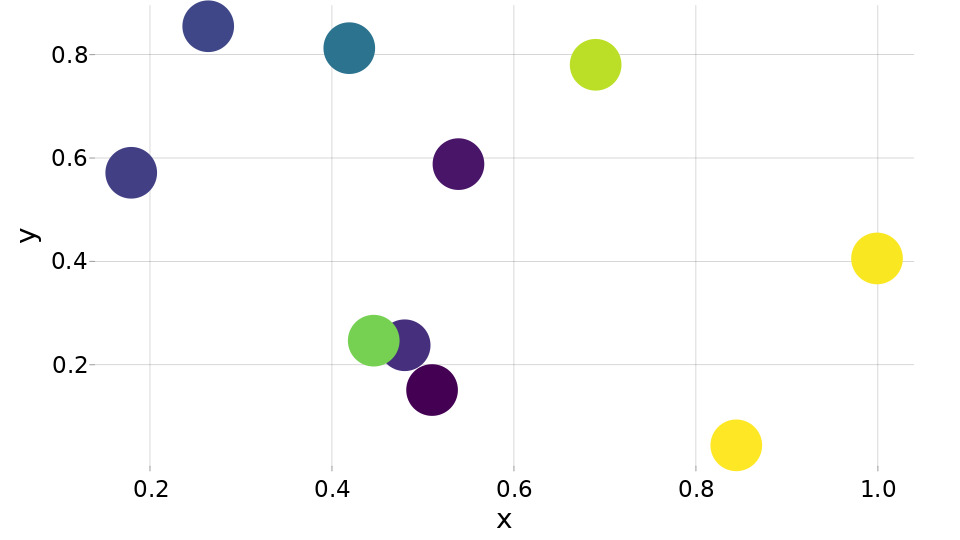

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/blegat/.julia/packages/AbstractPlotting/jOgYQ/src/display.jl:135


In [11]:
x = rand(10)
y = rand(10)
colors = rand(10)
scene = scatter(x, y, color = colors)

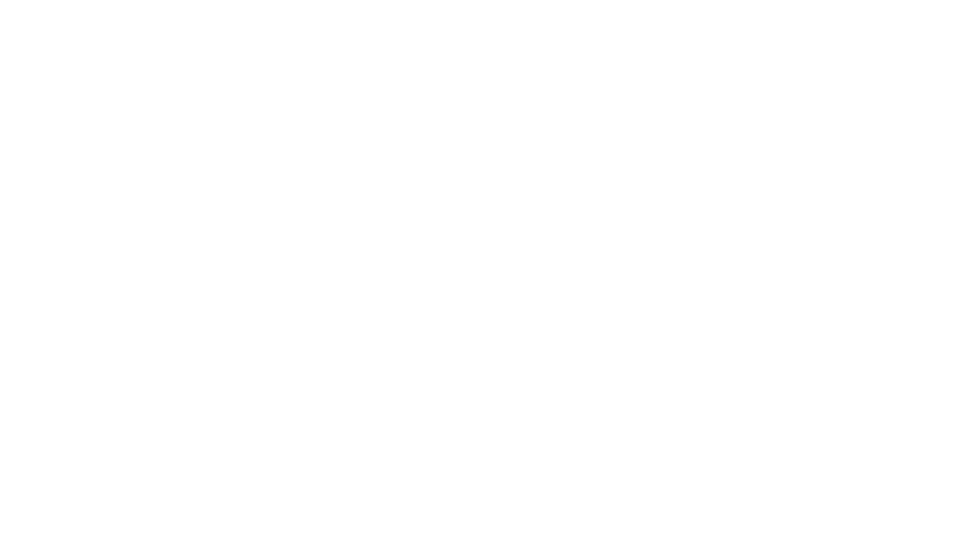

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/blegat/.julia/packages/AbstractPlotting/jOgYQ/src/display.jl:135


In [12]:
mesh(m, color=:blue)

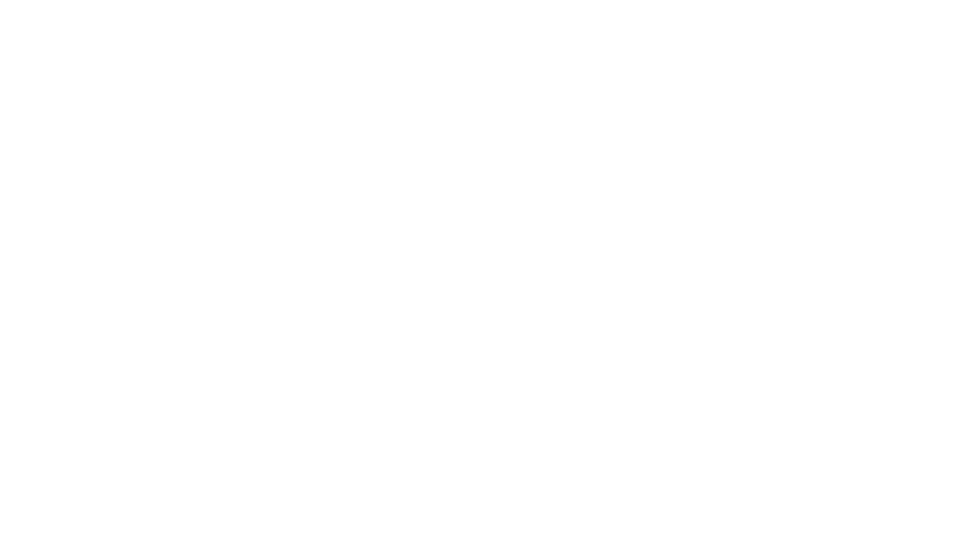

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/blegat/.julia/packages/AbstractPlotting/jOgYQ/src/display.jl:135


In [14]:
wireframe(m)

In [22]:
methods(Makie.GeometryBasics.mesh)

UndefVarError: UndefVarError: GeometryBasics not defined

In [24]:
methods(Polyhedra.GeometryBasics.mesh)

# 2 methods for generic function "mesh":
[1] mesh(primitive::Union{GeometryBasics.GeometryPrimitive{Dim,T}, AbstractArray{#s26,1} where #s26<:GeometryBasics.AbstractPoint{Dim,T}, GeometryBasics.Mesh{Dim,T,Element,V} where V<:AbstractArray{Element,1} where Element<:GeometryBasics.Polytope{Dim,T}, GeometryBasics.Tesselation{Dim,T,Primitive,NGrid} where NGrid where Primitive} where T where Dim; pointtype, facetype, uv, normaltype) in GeometryBasics at /home/blegat/.julia/packages/GeometryBasics/dwE6R/src/meshes.jl:106
[2] mesh(polygon::AbstractArray{P,1}; pointtype, facetype, normaltype) where P<:(GeometryBasics.AbstractPoint{2,T} where T) in GeometryBasics at /home/blegat/.julia/packages/GeometryBasics/dwE6R/src/meshes.jl:149

In [25]:
struct A end

In [26]:
wireframe(A())

MethodError: MethodError: no method matching coordinates(::A)
Closest candidates are:
  coordinates(!Matched::GeometryBasics.Ngon) at /home/blegat/.julia/packages/GeometryBasics/dwE6R/src/basic_types.jl:76
  coordinates(!Matched::GeometryBasics.Simplex) at /home/blegat/.julia/packages/GeometryBasics/dwE6R/src/basic_types.jl:142
  coordinates(!Matched::GeometryBasics.LineString) at /home/blegat/.julia/packages/GeometryBasics/dwE6R/src/basic_types.jl:180
  ...